# 逻辑回归

In [1]:
# 导入相关包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
# 读取数据集ex2data1.txt
data_path1 = 'ex2data1.txt'
data1 = pd.read_csv(data_path1,header=None,names=['Exam 1', 'Exam 2', 'Admitted'])
data1.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


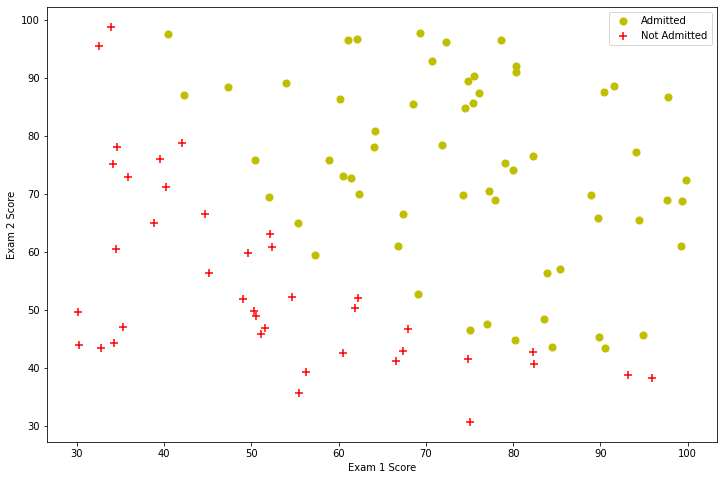

In [3]:
# 将数据集进行可视化
# 区分pos和neg的数据项
pos = data1[data1['Admitted']==1]
neg = data1[data1['Admitted']==0]
# 可视化展示
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pos['Exam 1'], pos['Exam 2'], s=50, c='y', marker='o', label='Admitted')
ax.scatter(neg['Exam 1'], neg['Exam 2'], s=50, c='r', marker='+', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

# Sigmoid 函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为：
$$g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$$ 
逻辑回归模型的假设函数： 
	$${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$$

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

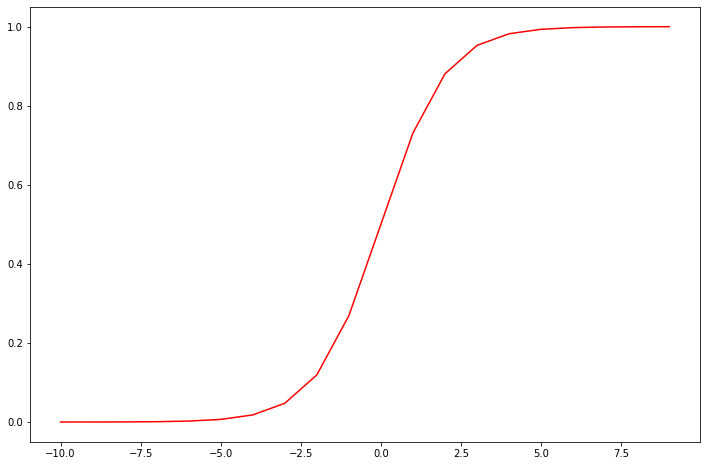

In [5]:
# 检查sigmoid函数
nums = np.arange(-10,10,1)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')
plt.show()

# 代价函数
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$$

In [6]:
def computeCost(theta,X,y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    m = len(X)
    J = np.sum(np.multiply(-y,np.log(sigmoid(X*theta.T))-np.multiply(1-y,np.log(1-sigmoid(X*theta.T)))))/m
    return J

In [7]:
# 变量设置
data1.insert(0,'Ones',1)
# 设置 X 和 y
cols = data1.shape[1]
X = data1.iloc[:,0:cols-1]
y = data1.iloc[:,cols-1:cols]
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [8]:
# 测试代价函数
computeCost(theta,X,y)

0.41588830833596724

# 梯度下降法（Gradient Descent）
* 这是批量梯度下降（batch gradient descent）  
* 转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [9]:
def gradient(theta, X, y):
    "计算梯度步长"
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    temp = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:, i])
        temp[i] = np.sum(term) / len(X)

    return temp

In [10]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [11]:
# 参数寻优
result = opt.fmin_tnc(func=computeCost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-5.25271347,  0.07915704,  0.01752157]), 85, 4)

In [12]:
computeCost(result[0], X, y)

0.12323596005753794

接下来，我们需要编写一个函数，用我们所学的参数theta来为数据集X输出预测。然后，我们可以使用这个函数来给我们的分类器的训练精度打分。
逻辑回归模型的假设函数： 
	$${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$$
当${{h}_{\theta }}$大于等于0.5时，预测 y=1,
当${{h}_{\theta }}$小于0.5时，预测 y=0

In [13]:
def predict(theta, X):
    "计算预测值"
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [14]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min,X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a,b) in zip(predictions,y)]
accuracy = (sum(map(int,correct)) % len(correct))
print('accuract={0}%'.format(accuracy))

accuract=86%
